In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055


In [6]:
google_data.shape

(2596, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2.596000e+03
mean,74.736544,75.533050,74.003774,74.788724,74.705964,3.181082e+07
std,41.653718,42.134399,41.242322,41.696253,41.654738,1.590671e+07
min,24.664783,24.730902,24.311253,24.560070,24.532154,1.584340e+05
25%,38.961625,39.135251,38.675424,38.872375,38.828189,2.193800e+07
50%,59.120499,59.707748,58.568750,59.231749,59.164423,2.794425e+07
75%,108.892374,111.339853,107.603748,109.384373,109.260038,3.656800e+07
max,191.750000,193.309998,190.619995,192.660004,192.660004,2.232980e+08


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2596 entries, 2014-03-27 to 2024-07-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2596 non-null   float64
 1   High       2596 non-null   float64
 2   Low        2596 non-null   float64
 3   Close      2596 non-null   float64
 4   Adj Close  2596 non-null   float64
 5   Volume     2596 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.0 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

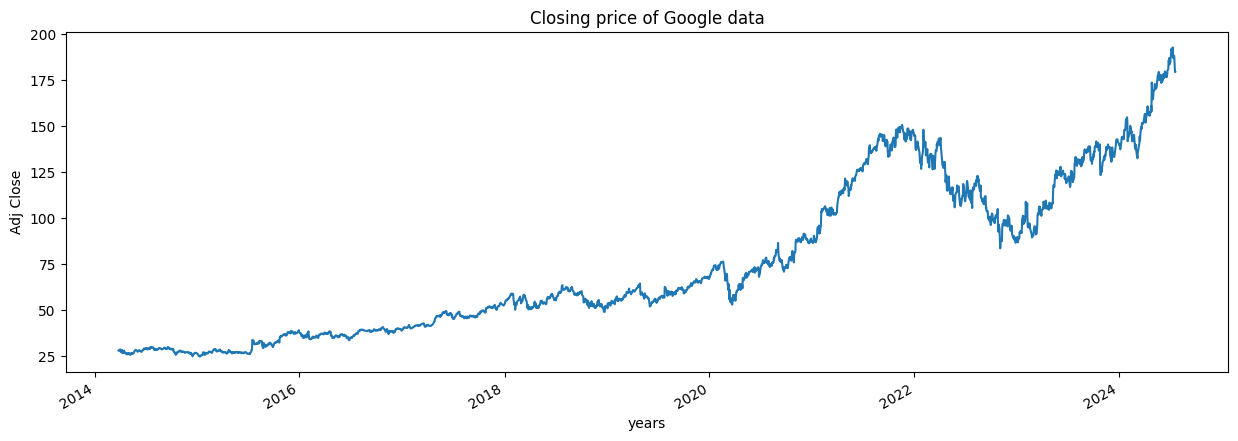

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

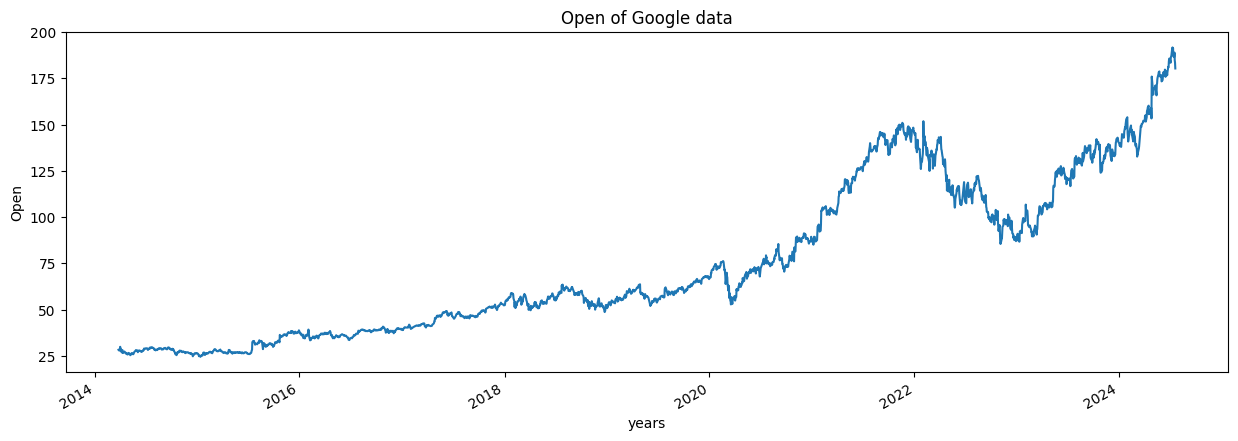

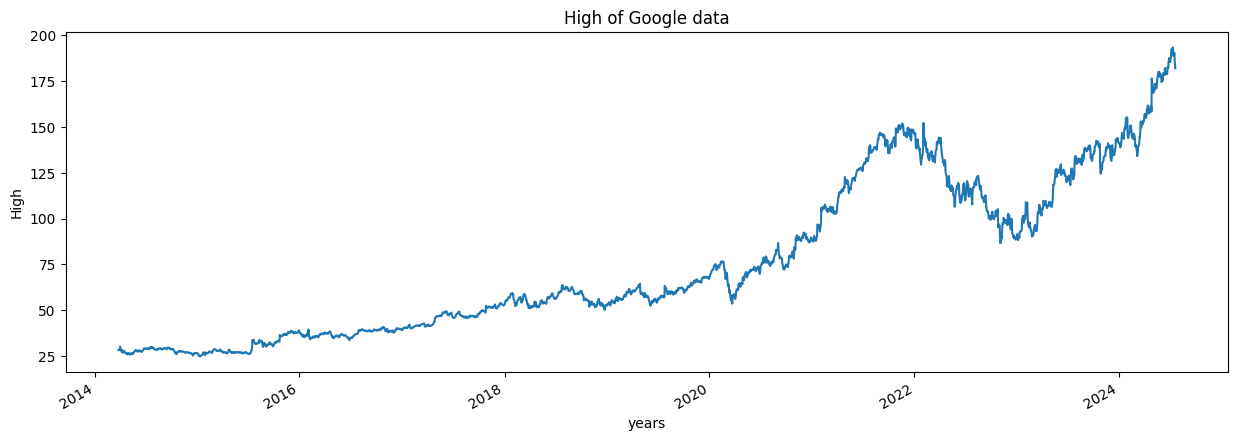

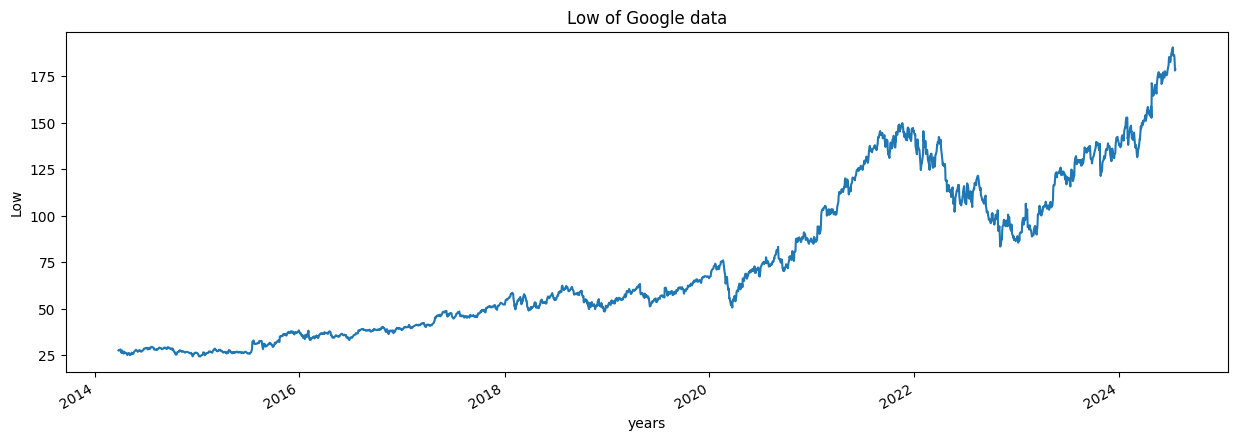

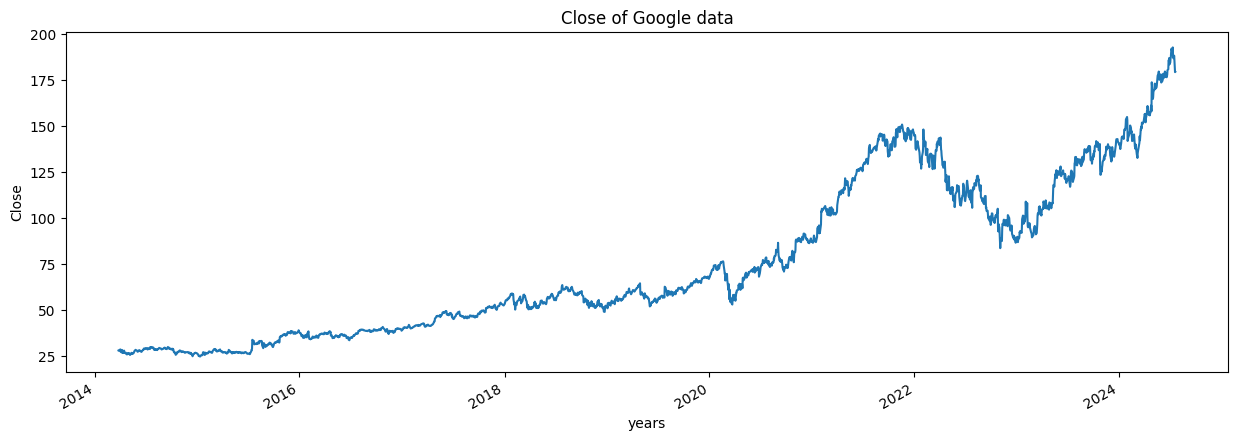

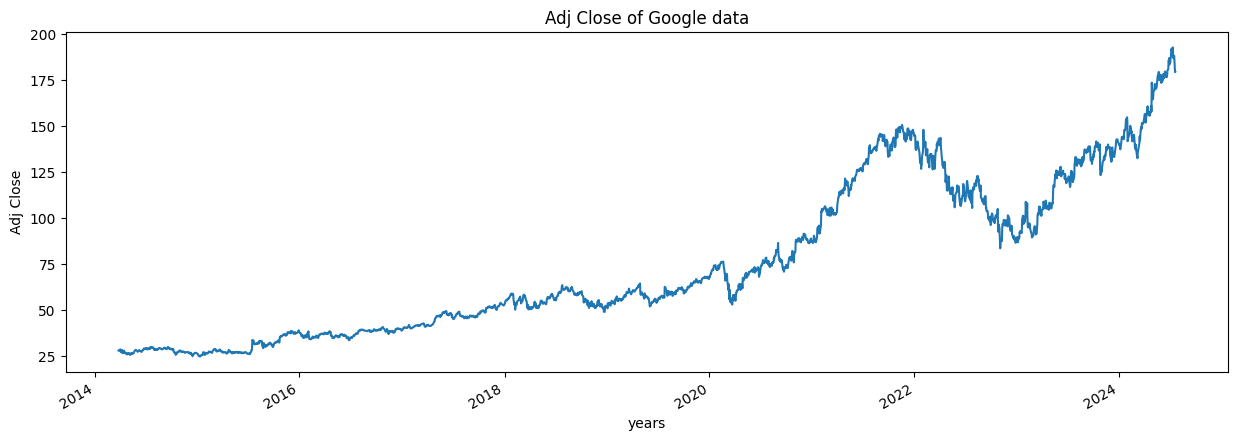

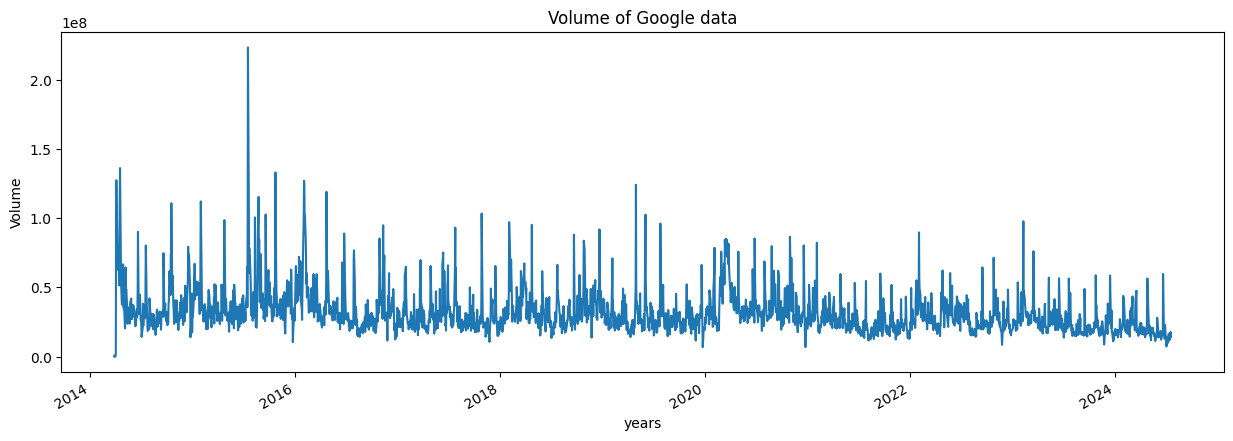

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 194
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 138


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24    27.40021
Name: MA_for_250_days, dtype: float64

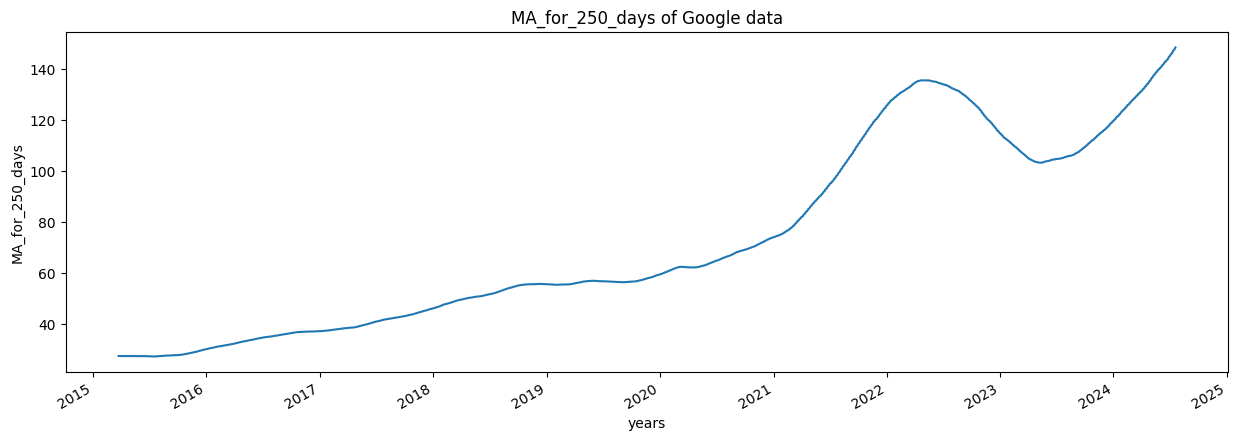

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

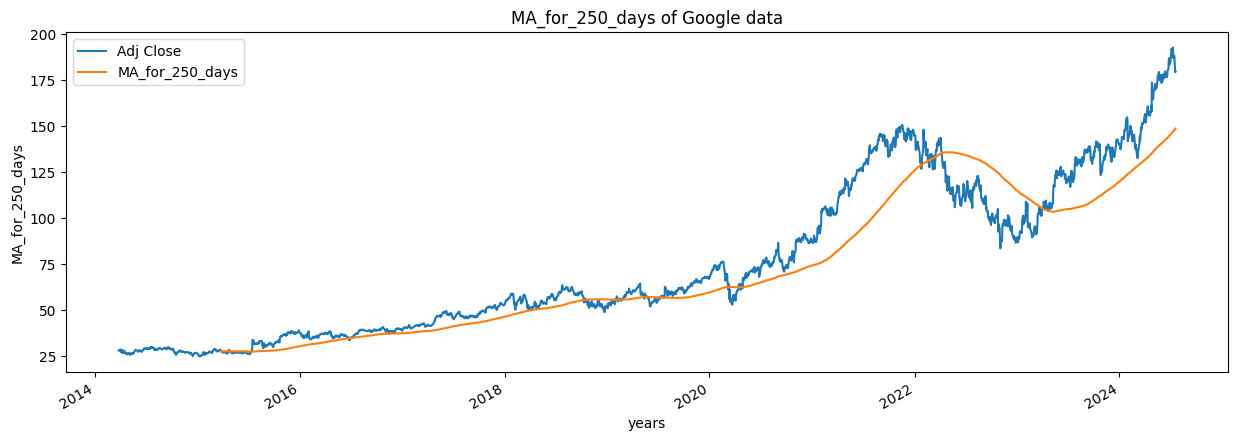

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

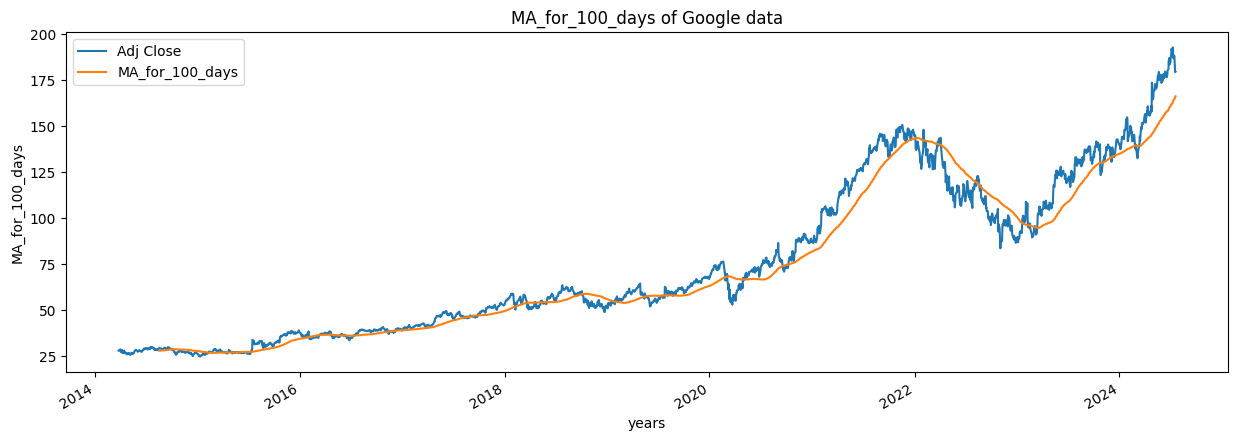

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

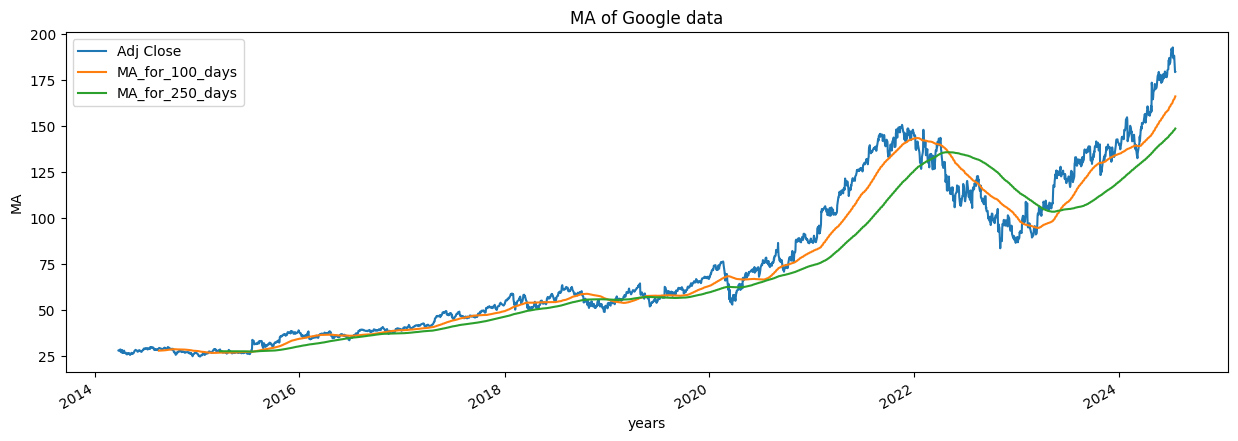

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-03-27,27.814894,NaN
2014-03-28,27.891100,0.002740
2014-03-31,27.740683,-0.005393
2014-04-01,28.248211,0.018295
2014-04-02,28.240242,-0.000282


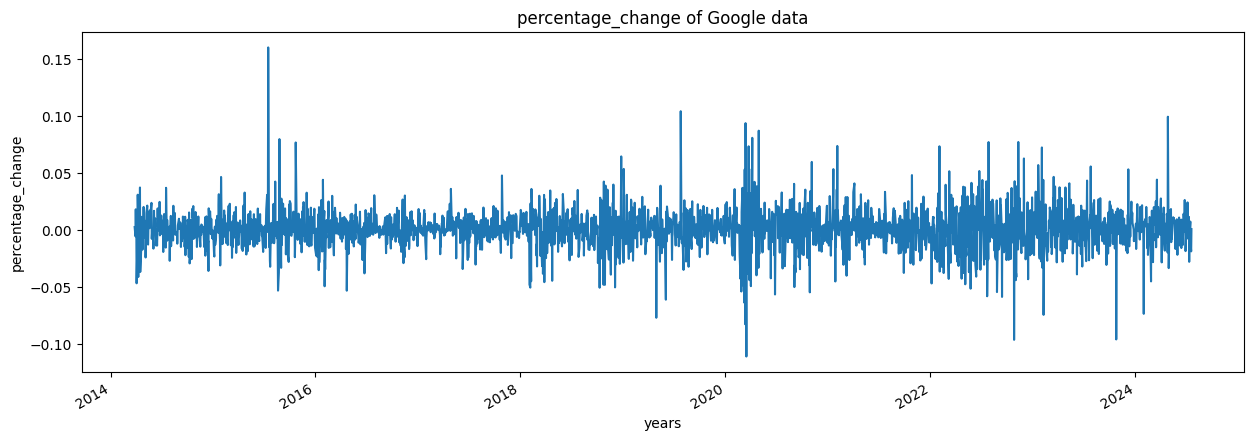

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.66000366]), array([24.53215408]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01952526],
       [0.01997852],
       [0.01908386],
       ...,
       [0.94028349],
       [0.92006082],
       [0.92107194]])

In [31]:
len(scaled_data)

2596

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.01952526],
        [0.01997852],
        [0.01908386],
        [0.02210257],
        [0.02205517],
        [0.02286686],
        [0.01498685],
        [0.01350861],
        [0.01847065],
        [0.02120792],
        [0.01433808],
        [0.01127198],
        [0.01184077],
        [0.01300204],
        [0.01895648],
        [0.01290131],
        [0.01068542],
        [0.01251916],
        [0.01018774],
        [0.00966043],
        [0.00700018],
        [0.00728754],
        [0.01041287],
        [0.01010479],
        [0.01149417],
        [0.01048101],
        [0.01044547],
        [0.00669209],
        [0.00515755],
        [0.00546565],
        [0.0077556 ],
        [0.01107053],
        [0.01200962],
        [0.01010183],
        [0.0081259 ],
        [0.00831845],
        [0.01075653],
        [0.01102611],
        [0.01374264],
        [0.01555564],
        [0.01781891],
        [0.02174412],
        [0.02047917],
        [0.02000518],
        [0.0199489 ],
        [0

In [34]:

int(len(x_data)*0.7)

1747

In [35]:
4908-100-int(len(x_data)*0.7)

3061

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1747, 100, 1)
(1747, 1)
(749, 100, 1)
(749, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\punit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0014
Epoch 2/2
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - loss: 3.9850e-04


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [44]:
predictions

array([[0.68264854],
       [0.6844428 ],
       [0.6846274 ],
       [0.6823632 ],
       [0.6810329 ],
       [0.6808204 ],
       [0.6807988 ],
       [0.68225807],
       [0.6840473 ],
       [0.6869507 ],
       [0.68966514],
       [0.6911061 ],
       [0.69278455],
       [0.6941396 ],
       [0.6958077 ],
       [0.69488716],
       [0.6923616 ],
       [0.6904211 ],
       [0.6913297 ],
       [0.6967716 ],
       [0.70424664],
       [0.7113809 ],
       [0.71546793],
       [0.72099197],
       [0.7268492 ],
       [0.7313969 ],
       [0.7349868 ],
       [0.7351024 ],
       [0.7349402 ],
       [0.73581755],
       [0.736004  ],
       [0.73609084],
       [0.7319414 ],
       [0.729752  ],
       [0.72863173],
       [0.73079264],
       [0.7323304 ],
       [0.72922087],
       [0.7219114 ],
       [0.71588   ],
       [0.7135234 ],
       [0.7142343 ],
       [0.7169633 ],
       [0.7180666 ],
       [0.7107946 ],
       [0.70019704],
       [0.68917465],
       [0.685

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[139.30438 ],
       [139.60605 ],
       [139.63708 ],
       [139.25641 ],
       [139.03275 ],
       [138.99702 ],
       [138.9934  ],
       [139.23874 ],
       [139.53955 ],
       [140.0277  ],
       [140.48407 ],
       [140.72633 ],
       [141.00853 ],
       [141.23634 ],
       [141.5168  ],
       [141.36203 ],
       [140.93741 ],
       [140.61116 ],
       [140.76393 ],
       [141.67886 ],
       [142.93562 ],
       [144.13509 ],
       [144.82224 ],
       [145.75098 ],
       [146.73575 ],
       [147.50034 ],
       [148.1039  ],
       [148.12334 ],
       [148.09605 ],
       [148.24358 ],
       [148.27492 ],
       [148.28952 ],
       [147.59189 ],
       [147.22379 ],
       [147.03543 ],
       [147.39874 ],
       [147.65729 ],
       [147.13449 ],
       [145.90556 ],
       [144.89151 ],
       [144.4953  ],
       [144.61482 ],
       [145.07364 ],
       [145.25914 ],
       [144.03653 ],
       [142.25478 ],
       [140.4016  ],
       [139.7

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[136.22648621],
       [136.38529968],
       [135.06729126],
       [135.83493042],
       [136.12509155],
       [135.87388611],
       [136.78434753],
       [136.88023376],
       [137.84513855],
       [137.93952942],
       [137.5329895 ],
       [138.23219299],
       [138.24868774],
       [138.75810242],
       [137.1444397 ],
       [136.41477966],
       [136.75787354],
       [138.27964783],
       [140.93911743],
       [142.2366333 ],
       [142.7875061 ],
       [141.9614563 ],
       [144.38619995],
       [145.30415344],
       [145.29666138],
       [145.67622375],
       [144.05506897],
       [144.61042786],
       [145.35359192],
       [144.71881104],
       [144.7487793 ],
       [141.75968933],
       [143.30192566],
       [143.24299622],
       [145.04093933],
       [144.20939636],
       [141.30270386],
       [138.85897827],
       [139.48776245],
       [140.77830505],
       [141.66529846],
       [142.47087097],
       [141.34016418],
       [136

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

4.368306823381391

In [49]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-07-28,136.226486,139.304382
2021-07-29,136.385300,139.606049
2021-07-30,135.067291,139.637085
2021-08-02,135.834930,139.256409
2021-08-03,136.125092,139.032745


<Figure size 640x480 with 0 Axes>

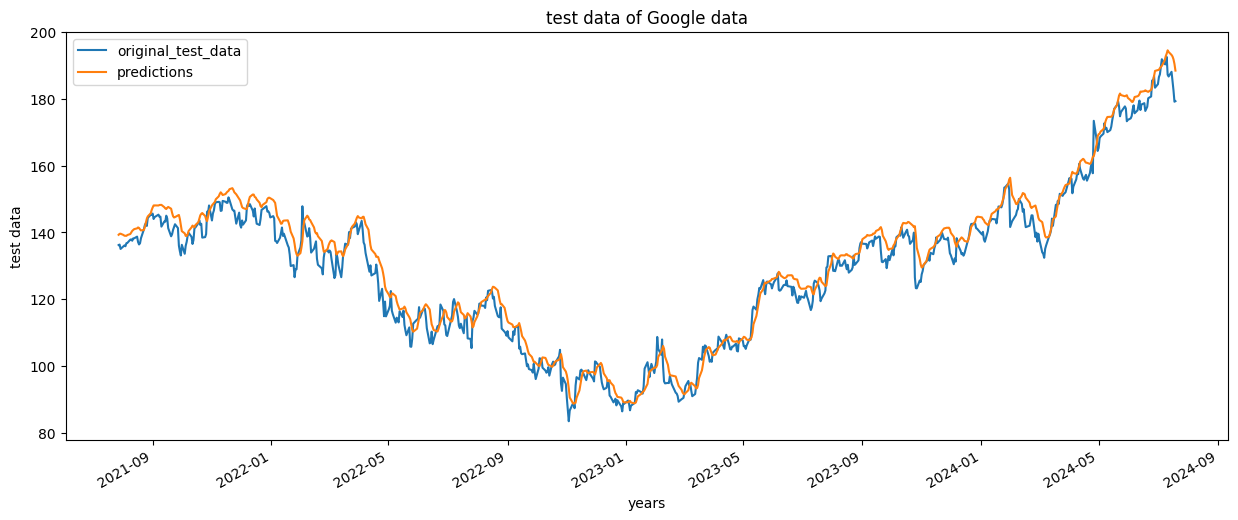

In [50]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

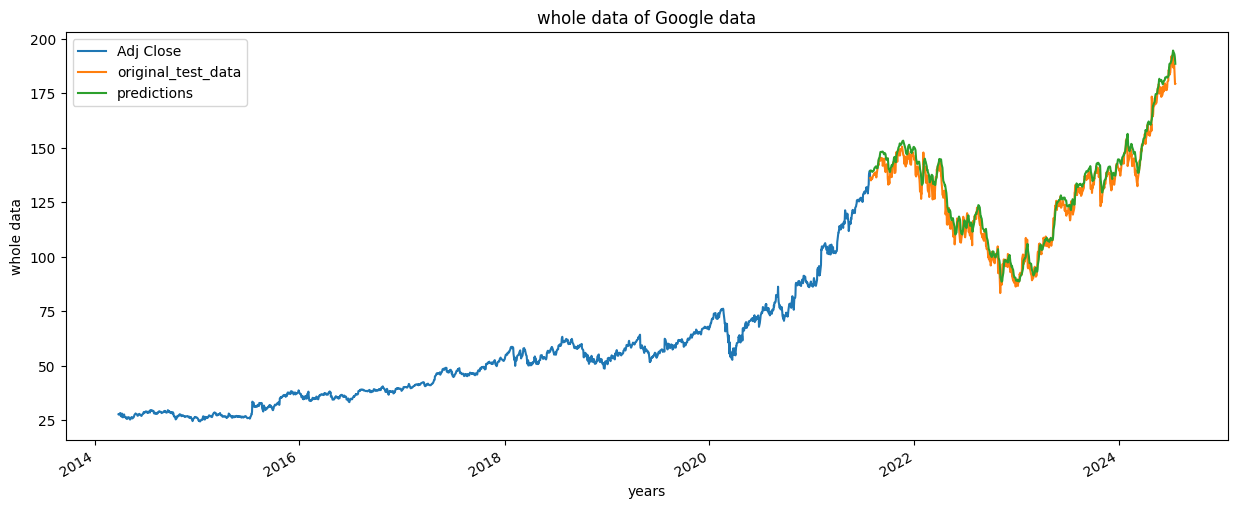

In [51]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [52]:
model.save("Latest_stock_price_model.keras")